# Machine Learning - Supervised algorithm (Kmeans)
Maestría Ciencias de Información y las Comunicaciones - Materia: Big Data.

Por: David Alonso Rueda Rodríguez - 20181395007 (daruedar@correo.udistrital.edu.co)

Tema: Preprocesamiento de datos.

#### Objetivo de la actividad:

Comprender la aplicación algoritmo K-means para segmentación de una población de flores

#### Fuente de datos:

Esta actividad está basada en la segmentación de una población de flores Iris, se el conjunto de datos fue entregado por Jorge Mario Calvo.

#### Temas trabajados

A continuación, listado de actividades trabajadas en el pre-procesamiento de datos:
    
##### Índice de temas
    1  Cargar Librerías
    2. Importar datos a dataframe de Pandas
    3. Revisar datos cargados
    4. Identificación de número óptimo de segmentos
    5. Aplicación del algoritmo no supervisado K-means
    
#### Listado de versiones

|Versión | Cambios|
|:--|:--|
|1.1.0 |Se mejoran explicaciones sobre análisis de los datos, incluyendo más gráficos y conclusiones iniciales sobre el trabajo|
|1.0.0|Preparación del documento siguiendo documento de referencia.| 

## 1. Cargar librerías

Se cargaron librerias estándar para análisis de datos, y librería sklearn

In [1]:
import matplotlib as mp
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns

## 2. Importar archivo a DataFrame de Pandas

In [2]:
# Lectura de archivos
iris = pd.read_csv("../src/Iris.csv")
# Verificación de archivo cargado
iris[145:150]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## 3. Revisión de datos cargados
### 3.1 ¿Qué tipo de datos fueron importados desde el archivo de texto plano?

Utilizando la función **info()** se revisará el tipo de datos importado

In [63]:
# Identificación de las columnas cargadas
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


Se observa que se cargaron 5 campos numéricos de los cuales uno de ellos es el Identificador, los demás campos hacen parte del análisis utilizado, y el último campo corresponde a un objeto que describe la especie a la cual pertenece la flor en el registro.

### 3. 2 ¿Se tienen valores nulos en los datos cargados?

Para revisar estos valores se utilizarán la función para determinación de valores nulos <<**isnull()**>>  y serán agregados por la función <<**sum()**>>

In [88]:
# ¿Se tienen valores nulos en las columnas cargadas?
datos_nulos = pd.DataFrame (iris.isnull().sum(), columns=['Registros nulos'])
datos_nulos

,Registros nulos
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


Como se puede apreciar en la tabla anterior en ninguna de las variables ingresados se tienen valores nulos
### 3.3 Descripción de los variables

### 3.3.1 Datos cualitativos

Se hizo una revisión de los datos cualitativos para comprender como estaban asignadas, se debe destacar que el paquete de datos únicamente tiene un campo de este tipo, adicionalmente, previo a la manipulación de los datos y debido a la alta divulgación del paquete se conocía que cada tipo de flor Iris tenía 50 muestras.

Con el objetivo de mejorar la presentación de los gráficos que incluyen las especies, se cambian los nombres originales de las especies por:

|Nombre Original| Nuevo Nombre|
|--|--|--|
|Iris-setosa|Setosa|
|Iris-versicolor|Versicolor|
|Iris-virginica|Virginica|


In [8]:
# Reemplaza los nombres originales por los nombres cortes
b = [cadena.replace("Iris-", "").title() for cadena in iris['Species']]
# Asignación de los nuevos valores al conjunto original
iris['Species'] = b
# Ejemplo de los nuevos datos
iris[49:51]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
49,50,5.0,3.3,1.4,0.2,Setosa
50,51,7.0,3.2,4.7,1.4,Versicolor


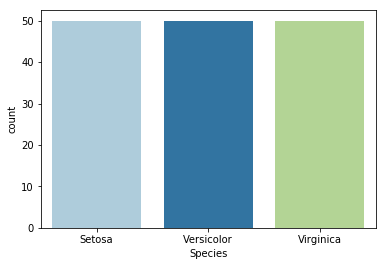

In [9]:
# Cantidad de especies en la muestra
sns.countplot (data = iris, x = 'Species', palette="Paired")

### 3.4. Estadística Descriptiva

#### 3.4.1 Datos numéricos a trabajarse

Con el objetivo de facilitar la manipulación de los datos numéricos se procede a guardarlos en el DataFrame *datos*

In [10]:
# Extraer sólo campos con datos numéricos
datos = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
# Presentación de los primeros 2 datos del nuevo DataFrame
datos.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


#### 3.4.2 Estadísticos básicos

In [11]:
# Estadística descriptiva de los campos entregados
datos.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


En primera instancia se observa que se tiene un total de 150 muestras, las cuales tienen 4 variables, el comportamiento de estas variables es el siguiente:

|Variable|Comportamiento|
|--|--|
|SepalLengthCm|La longitud del sépalo presenta una media de 5.84 centímetros con una desviación estándar de 0.82 centímetros, el valor mínimo encontrado es de 4.3 centímetros mientras el valor más alto fue de 7.9 centímetros.|
|SepalWidthCm|El ancho del sépalo presenta una media de 3.05 centímetros con una desviación estándar de 0.43 centímetros, el valor mínimo encontrado es de 2.0 centímetros mientras el valor más alto fue de 4.4 centímetros.|
|PetalLengthCm|La longitud del sépalo presenta una media de 3.75 centímetros con una desviación estándar de 1.76 centímetros, el valor mínimo encontrado es de 1.0 centímetros mientras el valor más alto fue de 6.9 centímetros.|
|PetalWidthCm|El ancho del pétalo presenta una media de 1.19 centímetros con una desviación estándar de 0.76 centímetros, el valor mínimo encontrado es de 0.1 centímetros mientras el valor más alto fue de 2.5 centímetros.|


#### 3.4.3 Datos atípicos

Se realizó una revisón de los datos atípicos para cada una de las variables numéricas, mediante el uso de los diagramas de cajas:

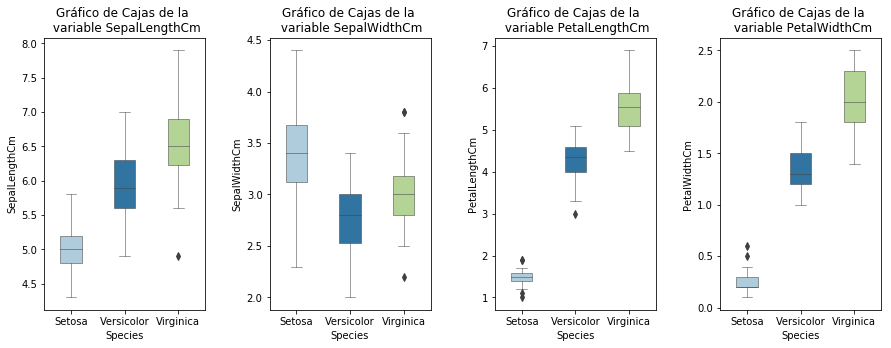

In [229]:
# Gráfico para las 4 variables numéricas de interés
mp.pyplot.figure(1 , figsize = (15 , 5))
n = 0 
# Se prepara un ciclo que recorra las 4 variables numéricas
for x in datos:
    n += 1
    mp.pyplot.subplot(1 , 4 , n)
    mp.pyplot.subplots_adjust(hspace =0.4 , wspace = 0.4)
    sns.boxplot(x=iris['Species'], y=datos[x], data=iris, width=0.40, palette="Paired", linewidth=.5)   
    mp.pyplot.title('Gráfico de Cajas de la \n variable {}'.format(x))
mp.pyplot.show()

|Variable| Explicación|
|--|--|
|Longitud del Sépalo (SepalLengthCm)|Se observan valores atípicos para la sub-especie virginica, en este caso el tamaño de los sépalos en algunas muestras se encuentra en un rango menor al mínimo estadístico.|
|Ancho del Sépalo (SepalWidthCm)|Se observan valores atípicos para la subespecie virginica, en este caso el tamaño de los sépalos en algunas muestras se encuentra en un rango menor y mayor con respecto a los estadísticos de referencia estadístico.|
|Londitud del Pétalo (PetalWidthCm)|En la subespecie Setosa se encuentran valores y mayores en los límites estadísticos, adiconalmente, en la especie versicolor se encuentran valores menores al mínimo de está sub-especie.|
|Ancho del Pétalo (PetalWidthCm)|Se observan valores atípicos para la sub-especie Setosa, en este caso el tamaño de algunas muestras se encuentran con valores mayores a los estadísticos de referencia.|

#### 3.4.4 ¿Los datos siguen algún tipo de distribución?

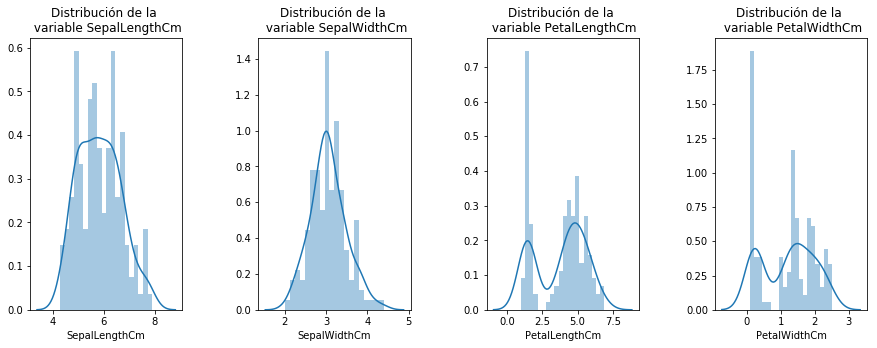

In [107]:
# ¿Cuál es el comportamiento de cada variable capturada?
mp.pyplot.figure(1 , figsize = (15 , 5))
n = 0 
for x in datos:
    n += 1
    mp.pyplot.subplot(1 , 4 , n)
    mp.pyplot.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(datos[x] , bins = 20)
    mp.pyplot.title('Distribución de la \n variable {}'.format(x))
mp.pyplot.show()

|Variable| Explicación|
|--|--|
|Longitud del Sépalo (SepalWidthCm)|Al revisar el comportamiento de los datos en el histograma se observan 3 picos en la gráfica que pueden llegar a ser atribuídos a las diferencias entre las especies de flor Iris, sin embago, este análisis debe validarse con otras pruebas|
|Ancho del Sépalo (SepalWidthCm)|Para el caso del ancho del sépalo las diferencias no se presentan tan marcadas, y el comportamiento de la gráfica de referencia (línea) se asemeja a una distribución simétrica, es posible pensar que sigue uan distribución normal, sin embargo es necesario aplicar prueba para confirmar ese idea.|
|Londitud del Pétalo (PetalLengthCm)|en este caso se observan claramente la presencia de 2 grupos en los datos de entrenamiento.|
|Ancho del Pétalo (PetalWidthCm)|En esta variable el gráfico de referencia muestra 2 grupos, pero al revisar el histograma se aprecian 3 grupos, así que inicialmente se infiere que el gráfico de referencia tiene un comportamiento similar a la variable Longitud del pétalo (**PetalLengthCm**)|


#### 3.4.5 Correlación entre las variables

En el análisis anterior se observaban algunas variables con gráficos de referencia con un comportamiento similar, la siguiente prueba tiene como objetivo validar la alta correlación entre 2 o más variables capturadas.

In [15]:
# Presentación de la matriz de correlación
correlacion = datos.corr()

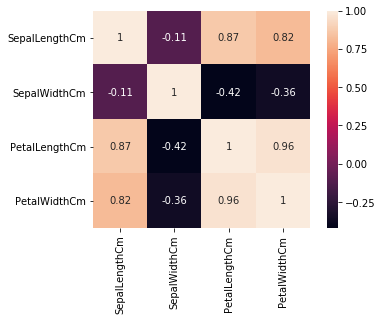

In [18]:
# La descripción gráfica de la matriz de correlación se presenta a continuación
img = sns.heatmap(correlacion, square=True, annot=True)

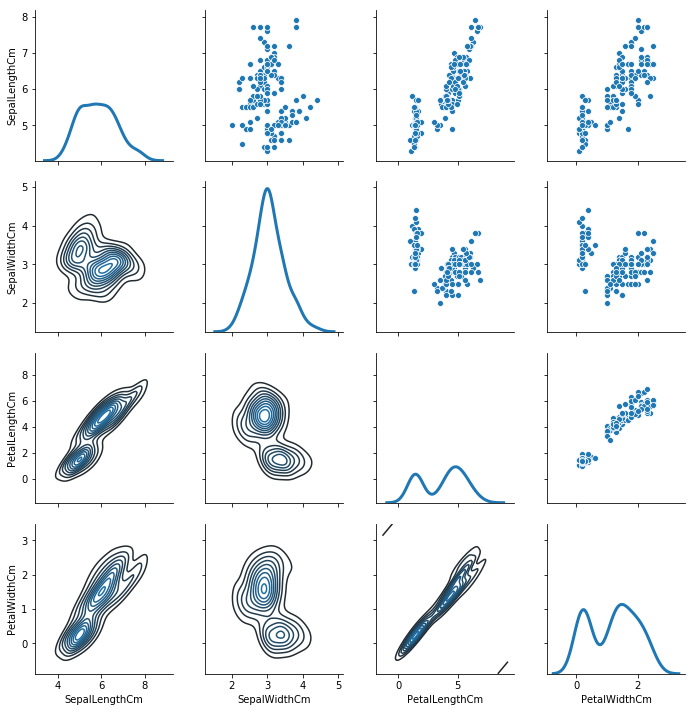

In [25]:
g = sns.PairGrid(datos, diag_sharey=True)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)

#### 3.4.5 Matriz de correlación

In [46]:
# Matriz de covarianza
datos.cov()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,0.516904,-0.117981,1.296387,0.582414


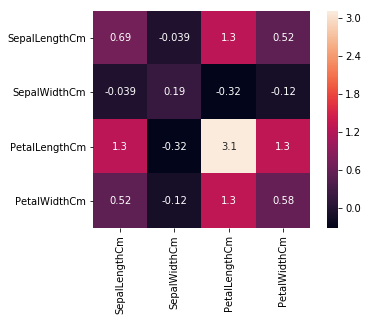

In [47]:
# Matriz de Varianza-Covarianza
sns.heatmap(datos.cov(), square=True, annot=True)

## 4. Identificacion de número óptimo de segmentación

La segmentación se hace utilizando el "método del codo", en donde los números óptimos serán identificados por el cambio de dirección.

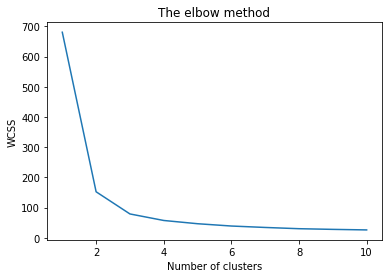

In [272]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(datos)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

## 5. Segmentación de los datos
### 5.1.

In [274]:
 kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(datos)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [276]:
plt.scatter(datos[y_kmeans == 0, 0], datos[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(datos[y_kmeans == 1, 0], datos[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(datos[y_kmeans == 2, 0], datos[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

TypeError: '(array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False,  True]), 0)' is an invalid key